# RBM training $L= 100$ - Dataset with $ T = 0$ and $ T = \infty$

In order to investigate the RBM flow in an extreme situation, we train the machine in an dataset composed only by frozen and random states. 

It is crucial to note that, since the visible layer is always fed with an unidimensional vector (an array is transformed in a vector to be fed in the visible layer), the machine does not have any geometric information about the lattice in this case.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split

from rbm import RBM
from mc_ising2d import IsingMC

import torch
import torch.nn as nn
torch.manual_seed(12)

L = 100

## Creating the dataset

#### Frozen configurations:

In [2]:
n_states = 1000

data_lowT_up = nn.init.constant_(torch.empty(int(n_states/2), L*L),
                                     val= 1.0)

data_lowT_down = nn.init.constant_(torch.empty(int(n_states/2), L*L),
                                     val= 0.0)

data_set_low = torch.cat((data_lowT_down, data_lowT_up), 0)

#### Random configurations:

In [3]:
nstates = 1000

up = nn.init.constant_(torch.empty(int(L*L/2)),
                                     val= 1.0)
down = nn.init.constant_(torch.empty(int(L*L/2)),
                                     val= 0.0)

up_down = torch.cat((up,down), 0)

data_set_high = up_down.reshape(1, up_down.shape[0])

for j in range(nstates - 1):
    
    data_set_high_ = up_down[torch.randperm(up_down.shape[0]) ]
    
    data_set_high = torch.cat( ( data_set_high, data_set_high_.reshape(1, data_set_high_.shape[0])), 0 )

#### Constructing training and test sets

Using `train_test_split` from [`sklearn`](http://scikit-learn.org/) it is easy to split the data into training and test sets.

In [4]:
train_data_low, test_data_low = train_test_split(np.array(data_set_low), 
                                                 test_size= 0.2, 
                                                 random_state= 12)

train_data_high, test_data_high = train_test_split(np.array(data_set_high),
                                                   test_size= 0.2,
                                                   random_state= 12)

In [5]:
training_set = torch.cat((torch.Tensor(train_data_low), torch.Tensor(train_data_high)), 0)
test_set = torch.cat((torch.Tensor(test_data_low), torch.Tensor(test_data_high)), 0)

training_set = training_set[torch.randperm(training_set.size()[0])]

#### Training the model

Our code implementing a Restricted Boltzmann Machine is written a python class called `RBM` which is imported from `rbm.py`.

For simplification, the units have no bias and the RBM stochasticity parameter, represented below by $T$ is set to unity, as usual in most practical applications. Note that we set `use_cuda=True`, which makes use of [CUDA tensor types](https://pytorch.org/docs/stable/cuda.html), implementing GPU computation. If a GPU is not available, one should just set `use_cuda=False`.

RBM --- Nv= 10000, Nh= 10000, lr= 1.0E-03, k= 1, Bsize= 100, Epochs= 1000, USE_CUDA= True, verbose= 1
Starting training
Ep 1, Rec er: 0.301423 (train), 0.266510 (test), Pseud_Lik: -22043.870719, Time: 26.667768, 
Ep 2, Rec er: 0.257086 (train), 0.249004 (test), Pseud_Lik: -18014.294520, Time: 23.759828, 
Ep 3, Rec er: 0.245683 (train), 0.242853 (test), Pseud_Lik: -15955.764142, Time: 24.407337, 
Ep 4, Rec er: 0.241036 (train), 0.240319 (test), Pseud_Lik: -15007.203175, Time: 29.088213, 
Ep 5, Rec er: 0.238304 (train), 0.238039 (test), Pseud_Lik: -13967.154270, Time: 19.828269, 
Ep 6, Rec er: 0.236753 (train), 0.236947 (test), Pseud_Lik: -13403.228654, Time: 20.957795, 
Ep 7, Rec er: 0.235250 (train), 0.235965 (test), Pseud_Lik: -12543.324931, Time: 21.949825, 
Ep 8, Rec er: 0.233937 (train), 0.235228 (test), Pseud_Lik: -11363.078997, Time: 21.297698, 
Ep 9, Rec er: 0.232898 (train), 0.234142 (test), Pseud_Lik: -10612.395675, Time: 20.501658, 
Ep 10, Rec er: 0.231747 (train), 0.233486 (

Ep 88, Rec er: 0.208873 (train), 0.223400 (test), Pseud_Lik: -3280.323510, Time: 19.076256, 
Ep 89, Rec er: 0.208737 (train), 0.223294 (test), Pseud_Lik: -3079.022422, Time: 19.050725, 
Ep 90, Rec er: 0.208471 (train), 0.223506 (test), Pseud_Lik: -2828.959700, Time: 19.068669, 
Ep 91, Rec er: 0.208278 (train), 0.223106 (test), Pseud_Lik: -3052.018533, Time: 19.228166, 
Ep 92, Rec er: 0.208129 (train), 0.223407 (test), Pseud_Lik: -3017.098512, Time: 19.130980, 
Ep 93, Rec er: 0.207911 (train), 0.223617 (test), Pseud_Lik: -3174.413885, Time: 20.108868, 
Ep 94, Rec er: 0.207772 (train), 0.223000 (test), Pseud_Lik: -3079.603946, Time: 19.077568, 
Ep 95, Rec er: 0.207419 (train), 0.223270 (test), Pseud_Lik: -2769.080673, Time: 19.083562, 
Ep 96, Rec er: 0.207375 (train), 0.222961 (test), Pseud_Lik: -3201.457085, Time: 19.119217, 
Ep 97, Rec er: 0.207153 (train), 0.223043 (test), Pseud_Lik: -3127.883244, Time: 19.051353, 
Ep 98, Rec er: 0.207014 (train), 0.223248 (test), Pseud_Lik: -2887.425

Ep 176, Rec er: 0.193485 (train), 0.222225 (test), Pseud_Lik: -1675.631266, Time: 19.031233, 
Ep 177, Rec er: 0.193507 (train), 0.222065 (test), Pseud_Lik: -1914.783216, Time: 19.058891, 
Ep 178, Rec er: 0.193523 (train), 0.221988 (test), Pseud_Lik: -1666.245974, Time: 19.088221, 
Ep 179, Rec er: 0.193089 (train), 0.221875 (test), Pseud_Lik: -1596.691450, Time: 19.966882, 
Ep 180, Rec er: 0.193027 (train), 0.222205 (test), Pseud_Lik: -1763.513702, Time: 19.032269, 
Ep 181, Rec er: 0.192620 (train), 0.222125 (test), Pseud_Lik: -1726.737055, Time: 19.048856, 
Ep 182, Rec er: 0.192683 (train), 0.222244 (test), Pseud_Lik: -1690.929826, Time: 19.038985, 
Ep 183, Rec er: 0.192450 (train), 0.222083 (test), Pseud_Lik: -1801.208031, Time: 19.028197, 
Ep 184, Rec er: 0.192311 (train), 0.222160 (test), Pseud_Lik: -1693.503677, Time: 19.037250, 
Ep 185, Rec er: 0.192225 (train), 0.222181 (test), Pseud_Lik: -1866.896608, Time: 20.220205, 
Ep 186, Rec er: 0.191921 (train), 0.222158 (test), Pseud_Lik

Ep 264, Rec er: 0.179346 (train), 0.221444 (test), Pseud_Lik: -1222.976977, Time: 19.528534, 
Ep 265, Rec er: 0.178961 (train), 0.221445 (test), Pseud_Lik: -1263.913769, Time: 19.774889, 
Ep 266, Rec er: 0.178817 (train), 0.221579 (test), Pseud_Lik: -1275.778865, Time: 19.544114, 
Ep 267, Rec er: 0.178714 (train), 0.221661 (test), Pseud_Lik: -1206.727003, Time: 19.530772, 
Ep 268, Rec er: 0.178606 (train), 0.221735 (test), Pseud_Lik: -1240.677049, Time: 19.558217, 
Ep 269, Rec er: 0.178334 (train), 0.221742 (test), Pseud_Lik: -1220.280978, Time: 19.585994, 
Ep 270, Rec er: 0.178231 (train), 0.221437 (test), Pseud_Lik: -1228.923069, Time: 19.536760, 
Ep 271, Rec er: 0.178120 (train), 0.221631 (test), Pseud_Lik: -1226.317411, Time: 19.804576, 
Ep 272, Rec er: 0.177926 (train), 0.221685 (test), Pseud_Lik: -1248.544188, Time: 19.565645, 
Ep 273, Rec er: 0.177813 (train), 0.221310 (test), Pseud_Lik: -1180.742385, Time: 19.530954, 
Ep 274, Rec er: 0.177668 (train), 0.221605 (test), Pseud_Lik

Ep 352, Rec er: 0.165630 (train), 0.220862 (test), Pseud_Lik: -939.940486, Time: 19.491084, 
Ep 353, Rec er: 0.165459 (train), 0.220868 (test), Pseud_Lik: -936.411849, Time: 19.458345, 
Ep 354, Rec er: 0.165221 (train), 0.220908 (test), Pseud_Lik: -903.322475, Time: 19.476298, 
Ep 355, Rec er: 0.164957 (train), 0.221139 (test), Pseud_Lik: -896.591183, Time: 19.497004, 
Ep 356, Rec er: 0.164830 (train), 0.221051 (test), Pseud_Lik: -1026.637677, Time: 19.485995, 
Ep 357, Rec er: 0.164714 (train), 0.221167 (test), Pseud_Lik: -901.579300, Time: 19.777039, 
Ep 358, Rec er: 0.164579 (train), 0.220865 (test), Pseud_Lik: -938.981459, Time: 19.473540, 
Ep 359, Rec er: 0.164554 (train), 0.221081 (test), Pseud_Lik: -873.918396, Time: 19.462794, 
Ep 360, Rec er: 0.164383 (train), 0.220932 (test), Pseud_Lik: -900.959956, Time: 19.473767, 
Ep 361, Rec er: 0.164223 (train), 0.220870 (test), Pseud_Lik: -956.318510, Time: 19.465872, 
Ep 362, Rec er: 0.164077 (train), 0.220921 (test), Pseud_Lik: -929.63

Ep 441, Rec er: 0.152694 (train), 0.220533 (test), Pseud_Lik: -800.982419, Time: 19.469770, 
Ep 442, Rec er: 0.152707 (train), 0.220493 (test), Pseud_Lik: -739.931555, Time: 19.503341, 
Ep 443, Rec er: 0.152525 (train), 0.220345 (test), Pseud_Lik: -681.086669, Time: 19.680845, 
Ep 444, Rec er: 0.152296 (train), 0.220199 (test), Pseud_Lik: -818.045220, Time: 19.484961, 
Ep 445, Rec er: 0.152193 (train), 0.220235 (test), Pseud_Lik: -792.243638, Time: 19.459711, 
Ep 446, Rec er: 0.151970 (train), 0.220161 (test), Pseud_Lik: -704.061890, Time: 20.385954, 
Ep 447, Rec er: 0.151863 (train), 0.220300 (test), Pseud_Lik: -754.891262, Time: 21.858182, 
Ep 448, Rec er: 0.151754 (train), 0.220278 (test), Pseud_Lik: -688.565256, Time: 19.059727, 
Ep 449, Rec er: 0.151510 (train), 0.220229 (test), Pseud_Lik: -712.157151, Time: 19.940363, 
Ep 450, Rec er: 0.151494 (train), 0.220568 (test), Pseud_Lik: -737.526897, Time: 19.068829, 
Ep 451, Rec er: 0.151416 (train), 0.220301 (test), Pseud_Lik: -707.533

Ep 530, Rec er: 0.140916 (train), 0.219453 (test), Pseud_Lik: -605.242729, Time: 19.595460, 
Ep 531, Rec er: 0.140892 (train), 0.219681 (test), Pseud_Lik: -607.025833, Time: 19.549847, 
Ep 532, Rec er: 0.140723 (train), 0.219660 (test), Pseud_Lik: -618.390461, Time: 19.544753, 
Ep 533, Rec er: 0.140602 (train), 0.219813 (test), Pseud_Lik: -630.210380, Time: 26.845305, 
Ep 534, Rec er: 0.140408 (train), 0.219442 (test), Pseud_Lik: -597.906503, Time: 29.934399, 
Ep 535, Rec er: 0.140265 (train), 0.219699 (test), Pseud_Lik: -637.245077, Time: 21.911537, 
Ep 536, Rec er: 0.140239 (train), 0.219754 (test), Pseud_Lik: -578.536158, Time: 20.566204, 
Ep 537, Rec er: 0.139979 (train), 0.219725 (test), Pseud_Lik: -597.247973, Time: 36.920212, 
Ep 538, Rec er: 0.139925 (train), 0.219643 (test), Pseud_Lik: -628.712270, Time: 22.572321, 
Ep 539, Rec er: 0.139852 (train), 0.219576 (test), Pseud_Lik: -623.662472, Time: 22.124059, 
Ep 540, Rec er: 0.139696 (train), 0.219602 (test), Pseud_Lik: -608.372

Ep 619, Rec er: 0.130252 (train), 0.218819 (test), Pseud_Lik: -515.203065, Time: 21.030136, 
Ep 620, Rec er: 0.130116 (train), 0.218981 (test), Pseud_Lik: -520.145295, Time: 21.934997, 
Ep 621, Rec er: 0.130154 (train), 0.219171 (test), Pseud_Lik: -509.288671, Time: 20.279641, 
Ep 622, Rec er: 0.130014 (train), 0.219077 (test), Pseud_Lik: -506.522695, Time: 20.982593, 
Ep 623, Rec er: 0.129768 (train), 0.218944 (test), Pseud_Lik: -528.959175, Time: 21.887389, 
Ep 624, Rec er: 0.129622 (train), 0.219249 (test), Pseud_Lik: -506.502361, Time: 26.467344, 
Ep 625, Rec er: 0.129588 (train), 0.218785 (test), Pseud_Lik: -522.622980, Time: 22.533132, 
Ep 626, Rec er: 0.129357 (train), 0.219005 (test), Pseud_Lik: -521.910175, Time: 24.651061, 
Ep 627, Rec er: 0.129269 (train), 0.219031 (test), Pseud_Lik: -519.974747, Time: 20.373037, 
Ep 628, Rec er: 0.129256 (train), 0.219168 (test), Pseud_Lik: -514.941513, Time: 21.211800, 
Ep 629, Rec er: 0.129133 (train), 0.219160 (test), Pseud_Lik: -495.895

Ep 708, Rec er: 0.120622 (train), 0.218422 (test), Pseud_Lik: -454.252845, Time: 19.538810, 
Ep 709, Rec er: 0.120537 (train), 0.218444 (test), Pseud_Lik: -417.378258, Time: 20.414444, 
Ep 710, Rec er: 0.120500 (train), 0.218544 (test), Pseud_Lik: -473.766970, Time: 23.011374, 
Ep 711, Rec er: 0.120367 (train), 0.218213 (test), Pseud_Lik: -446.555376, Time: 19.649300, 
Ep 712, Rec er: 0.120395 (train), 0.218325 (test), Pseud_Lik: -458.643072, Time: 19.636537, 
Ep 713, Rec er: 0.120183 (train), 0.218370 (test), Pseud_Lik: -459.761156, Time: 19.656348, 
Ep 714, Rec er: 0.120094 (train), 0.218562 (test), Pseud_Lik: -430.205506, Time: 19.562364, 
Ep 715, Rec er: 0.120107 (train), 0.218178 (test), Pseud_Lik: -426.722796, Time: 20.231206, 
Ep 716, Rec er: 0.119947 (train), 0.218521 (test), Pseud_Lik: -419.450469, Time: 19.683604, 
Ep 717, Rec er: 0.119749 (train), 0.218539 (test), Pseud_Lik: -438.912647, Time: 19.617524, 
Ep 718, Rec er: 0.119761 (train), 0.218499 (test), Pseud_Lik: -432.390

Ep 797, Rec er: 0.112151 (train), 0.217847 (test), Pseud_Lik: -413.737753, Time: 24.949318, 
Ep 798, Rec er: 0.112118 (train), 0.217810 (test), Pseud_Lik: -436.473006, Time: 22.839270, 
Ep 799, Rec er: 0.111976 (train), 0.217790 (test), Pseud_Lik: -417.920567, Time: 20.830290, 
Ep 800, Rec er: 0.111822 (train), 0.217639 (test), Pseud_Lik: -415.900608, Time: 21.442093, 
Ep 801, Rec er: 0.111726 (train), 0.217477 (test), Pseud_Lik: -400.228435, Time: 21.686970, 
Ep 802, Rec er: 0.111714 (train), 0.217996 (test), Pseud_Lik: -400.493508, Time: 21.183570, 
Ep 803, Rec er: 0.111644 (train), 0.217867 (test), Pseud_Lik: -378.674067, Time: 24.079886, 
Ep 804, Rec er: 0.111420 (train), 0.217555 (test), Pseud_Lik: -399.465865, Time: 21.815424, 
Ep 805, Rec er: 0.111550 (train), 0.217848 (test), Pseud_Lik: -391.056382, Time: 20.535478, 
Ep 806, Rec er: 0.111409 (train), 0.217771 (test), Pseud_Lik: -385.002091, Time: 23.479934, 
Ep 807, Rec er: 0.111307 (train), 0.217953 (test), Pseud_Lik: -392.873

Ep 886, Rec er: 0.104581 (train), 0.217422 (test), Pseud_Lik: -349.968814, Time: 23.966893, 
Ep 887, Rec er: 0.104433 (train), 0.217460 (test), Pseud_Lik: -387.118257, Time: 23.596942, 
Ep 888, Rec er: 0.104472 (train), 0.217219 (test), Pseud_Lik: -363.569247, Time: 28.442053, 
Ep 889, Rec er: 0.104311 (train), 0.217089 (test), Pseud_Lik: -344.728517, Time: 23.974470, 
Ep 890, Rec er: 0.104196 (train), 0.217298 (test), Pseud_Lik: -363.180214, Time: 25.443305, 
Ep 891, Rec er: 0.104155 (train), 0.217396 (test), Pseud_Lik: -345.328435, Time: 21.193176, 
Ep 892, Rec er: 0.104137 (train), 0.217231 (test), Pseud_Lik: -347.870774, Time: 23.639835, 
Ep 893, Rec er: 0.104052 (train), 0.217225 (test), Pseud_Lik: -370.608110, Time: 21.692953, 
Ep 894, Rec er: 0.103878 (train), 0.217092 (test), Pseud_Lik: -350.571562, Time: 22.464750, 
Ep 895, Rec er: 0.103857 (train), 0.217298 (test), Pseud_Lik: -327.673273, Time: 29.675047, 
Ep 896, Rec er: 0.103790 (train), 0.217429 (test), Pseud_Lik: -348.400

Ep 975, Rec er: 0.097917 (train), 0.216696 (test), Pseud_Lik: -321.027988, Time: 19.575318, 
Ep 976, Rec er: 0.097757 (train), 0.217022 (test), Pseud_Lik: -314.438234, Time: 19.566846, 
Ep 977, Rec er: 0.097611 (train), 0.216829 (test), Pseud_Lik: -342.599295, Time: 19.608018, 
Ep 978, Rec er: 0.097611 (train), 0.216960 (test), Pseud_Lik: -315.466808, Time: 19.559610, 
Ep 979, Rec er: 0.097530 (train), 0.216868 (test), Pseud_Lik: -327.984981, Time: 19.678401, 
Ep 980, Rec er: 0.097510 (train), 0.216671 (test), Pseud_Lik: -304.232845, Time: 19.663090, 
Ep 981, Rec er: 0.097418 (train), 0.216780 (test), Pseud_Lik: -312.415488, Time: 19.573414, 
Ep 982, Rec er: 0.097256 (train), 0.216916 (test), Pseud_Lik: -310.104528, Time: 19.564134, 
Ep 983, Rec er: 0.097272 (train), 0.216565 (test), Pseud_Lik: -303.179699, Time: 19.552281, 
Ep 984, Rec er: 0.097165 (train), 0.216512 (test), Pseud_Lik: -310.619773, Time: 19.601975, 
Ep 985, Rec er: 0.097071 (train), 0.216948 (test), Pseud_Lik: -316.569

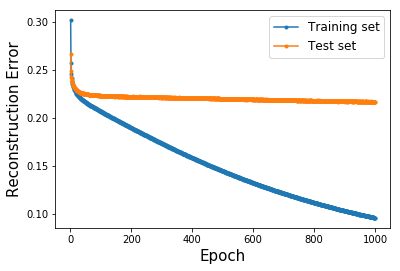

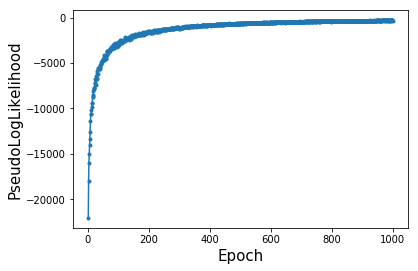

In [6]:
Nv = training_set.shape[1]
Nh = training_set.shape[1]

lr = 0.001
k_learning = 1
batch_size = 100
nb_epoch = 1000
k_sampling = 1

rbm = RBM(num_visible= Nv, 
          num_hidden= Nh, 
          bias= False,
          T= 1.0,
          use_cuda= True)
    
rbm.learn(training_set= training_set,
          test_set = test_set,
          lr= lr, 
          nb_epoch= nb_epoch, 
          batch_size= batch_size,
          k_learning= k_learning,
          k_sampling= k_sampling,
          verbose= 1)

#### Saving the trained model

In [7]:
nb_epoch = rbm.num_train_epochs()

name = 'RBM_model_zero_inf_T__UP_DOWN_nv%d_nh%d_lr%.1E_k%d_bsize%d_nepochs%d' % (Nv,
                                                                                  Nh,
                                                                                  lr,
                                                                                  k_learning,
                                                                                  batch_size,
                                                                                  nb_epoch)

PATH = 'RBM_trained_models/'+ name + '.pt'

torch.save(rbm, PATH)

### Weights distribution

In [8]:
W, v, h = rbm.parameters()

del v
del h
torch.cuda.empty_cache()

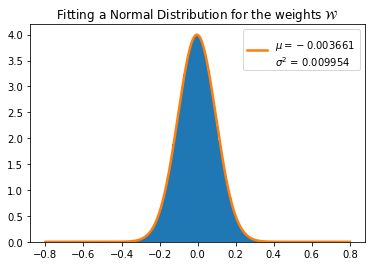

In [9]:
W_ = W.cpu().numpy().reshape((W.shape[0]*W.shape[1]))

# Plot normalized histogram 
plt.hist(W_, bins= 100, density= True)

# Maximum and minimum of xticks to compute the theoretical distribution 
x_min, x_max = min(plt.xticks()[0]), max(plt.xticks()[0])  
domain = np.linspace(x_min, x_max, len(W_))

# Fitting a normal distribution
muW_, sigmaW_ = stats.norm.fit(W_) 

plot_pdf = stats.norm.pdf(domain, muW_, sigmaW_) # Fitting the PDF in the interval


plt.plot(domain, plot_pdf, linewidth= 2.5,
         label= '$\mu= %f$ \n$\sigma^2$ = %f' % (muW_, sigmaW_**2 ))

plt.title('Fitting a Normal Distribution for the weights ${\cal W}$')
plt.legend()
plt.show()

In [10]:
del W
torch.cuda.empty_cache()

In [1]:
import numpy as np
np.sqrt(0.009954)

0.09976973488989534